read from  /Users/jonathanfoley/Code/wpspecdev/wpspecdev/data/Au_JC_RI_f.txt
 Your spectra have been computed! 😎 


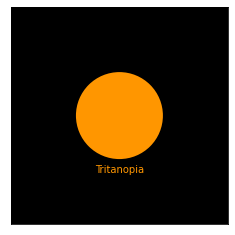

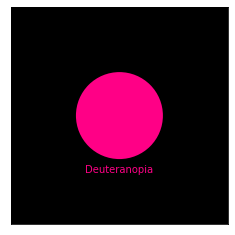

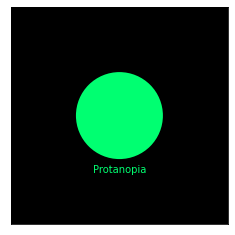

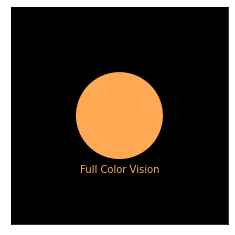

In [2]:
import wpspecdev
import numpy as np

test_1_args = {
    "wavelength_list": [400e-9, 800e-9, 1000],
    "material_list": ["Air","Au","Air"],
    "thickness_list": [0, 200e-9, 0],
}

sf = wpspecdev.SpectrumFactory()  
test = sf.spectrum_factory('Tmm', test_1_args)

test.render_color("Tritanopia", colorblindness="Tritanopia")
test.render_color("Deuteranopia", colorblindness="Deuteranopia")
test.render_color("Protanopia", colorblindness="Protanopia")
test.render_color("Full Color Vision", colorblindness="False")


In [2]:
thickness = 100e-9


In [4]:
sf = wpspecdev.SpectrumFactory()
mt = sf.spectrum_factory('Tmm', thickness)
print(mt.wavelength_array)
print(mt.TiO2())

[4.00000000e-07 4.44444444e-07 4.88888889e-07 5.33333333e-07
 5.77777778e-07 6.22222222e-07 6.66666667e-07 7.11111111e-07
 7.55555556e-07 8.00000000e-07]
[2.4+0.j 2.4+0.j 2.4+0.j 2.4+0.j 2.4+0.j 2.4+0.j 2.4+0.j 2.4+0.j 2.4+0.j
 2.4+0.j]


In [ ]:
# row index specifies wavelength, column index specifies layer
mt._refractive_index_array[0, 2]

def compute_dm(wl_idx, layer_idx, angle, polarization, _refractive_index_array):
        
    """ compute the D and D_inv matrices for each layer and wavelength
        
            Attributes
            ----------
                refractive_index_array
                
                polarization
                
                _cos_of_refraction_angle_array
                
                _dm
                
                _dim
                
                
            Returns
            -------
            None
    """
    D = np.zeros((2,2),dtype=complex)
    if (polarization == "s"):
        D[0][0] = 1.+0j
        D[0][1] = 1.+0j
        D[1][0] = np.cos(angle)*_refractive_index_array[wl_idx, layer_idx]
        D[1][1] = -1*np.cos(angle)*_refractive_index_array[wl_idx, layer_idx]


    elif (polarization == "p"):
        D[0][0] = np.cos(angle)+0j
        D[0][1] = np.cos(angle)+0j
        D[1][0] = _refractive_index_array[wl_idx, layer_idx]
        D[1][1] = -1*_refractive_index_array[wl_idx, layer_idx]

    else:
            
        print("needs polarization s or p")

    print(D)
    if layer_idx == 0:
        return np.linalg.inv(D)
    elif layer_idx == 2:
        return D
    else:
        D = np.matmul(D,np.linalg.inv(D))
        return D


In [ ]:
D = compute_dm(0, 2, 0,'s', mt._refractive_index_array)

In [ ]:
class A:
    def sayhi():
        print("A")                          

class B:
    def saylo(arg):
        print(arg)                         

        
class M(A,B):
    pass

M.sayhi()
M.saylo("bbbb")


In [ ]:
print(mt._an)
        # pre-compute terms that will be used numerous times in computing coefficients
#        _jnx = spherical_jn(1 , x)
#        _jnmx = spherical_jn(1 , m * x)

expected_an = np.array([1.51561398e-07-3.89308843e-04j, 
                            1.20867988e-13-3.47660737e-07j,
                            2.12941403e-20-1.45925119e-10j, 
                            1.23296734e-27-3.51136346e-14j,
                            2.97642974e-35-5.45566654e-18j, 
                            3.49894198e-43-5.91518553e-22j,
                            2.23336769e-51-4.72585198e-26j])

print(expected_an)

In [ ]:
lam_array = np.linspace(500e-9, 800e-9, 10)
for lamb in lam_array:
    x = 2 * np.pi * r / lamb
    mt._compute_mie_coeffients(ri, mu, x)
    print(f'Lambda: {lamb}, len {len(mt._an)} a_n {np.real(mt._an)}')
    